In [52]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


In [8]:
mnist = tf.keras.datasets.mnist

# Split the dataset into training and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [17]:
print(np.max(X_train),np.min(X_train))
#each image is a 28x28 matrix in greyscale where each cell represent a pixel 0-255 0=black 255=white

255 0


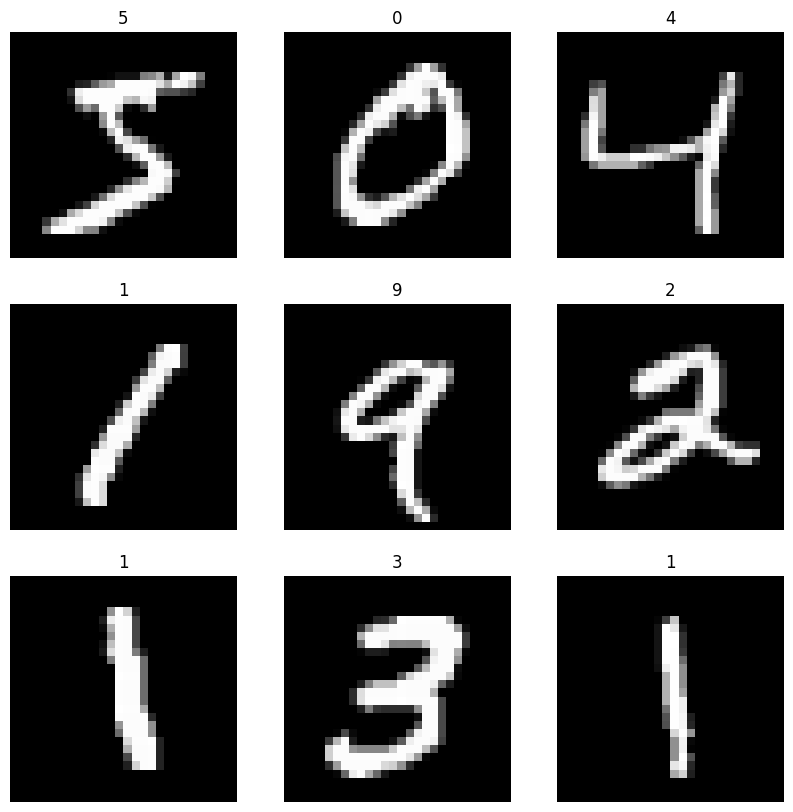

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

In [25]:
#scaling/normalizing the features(images)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Using machine learning


In [31]:
X_flatten_train= np.zeros((60000, 784))
for i in range(X_train.shape[0]):
    X_flatten_train[i]=X_train[i].flatten()

In [34]:
X_flatten_test= np.zeros((10000, 784))
for i in range(X_test.shape[0]):
    X_flatten_test[i]=X_test[i].flatten()

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_flatten_train, y_train)
y_pred=rf.predict(X_flatten_test)



In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.97
Confusion Matrix:
[[ 970    0    0    0    0    1    3    1    4    1]
 [   0 1125    2    3    0    1    2    1    1    0]
 [   6    1  998    6    1    0    4   10    6    0]
 [   0    0   10  977    0    4    0    9    8    2]
 [   1    0    2    0  958    0    5    0    2   14]
 [   2    0    0   12    3  862    6    2    4    1]
 [   7    3    0    0    5    5  936    0    2    0]
 [   1    3   20    0    2    0    0  992    1    9]
 [   4    0    5    7    2    7    4    4  934    7]
 [   5    7    2   11   11    3    1    3    5  961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98 

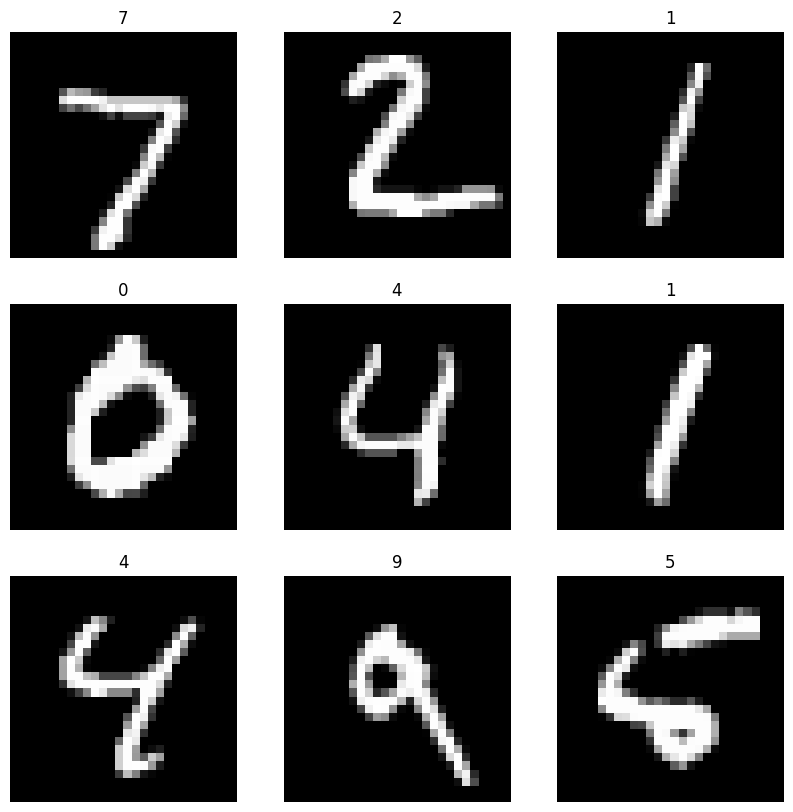

In [40]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title(y_pred[i])
    plt.axis('off')

In [41]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_flatten_train,y_train)
y_pred=svc.predict(X_flatten_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99 

In [43]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_flatten_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred=xgboost_clf.predict(X_flatten_test)


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[ 970    1    0    0    0    2    3    1    2    1]
 [   1 1125    3    2    0    1    2    1    0    0]
 [   5    0 1008    7    2    0    0    6    3    1]
 [   1    0    3  990    0    3    0    6    4    3]
 [   0    0    2    1  958    0    4    0    2   15]
 [   2    1    0    5    0  872    4    3    3    2]
 [   5    3    1    0    2    4  940    0    3    0]
 [   1    1   13    1    2    0    0 1000    1    9]
 [   3    1    2    3    3    4    2    1  951    4]
 [   5    4    1    5    6    0    0    4    3  981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98 

### Deep learning cuz why not

In [47]:
model=tf.keras.models.Sequential()

In [48]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)),)
model.add(tf.keras.layers.Dense(128, activation='relu'),)
model.add(tf.keras.layers.Dense(64, activation='relu'),)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Users\El BAR\Documents\ds_projects\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [62]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0516 - val_accuracy: 0.9584 - val_loss: 0.1709
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0544 - val_accuracy: 0.9653 - val_loss: 0.1279
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0500 - val_accuracy: 0.9717 - val_loss: 0.1171
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0438 - val_accuracy: 0.9758 - val_loss: 0.1025
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0397 - val_accuracy: 0.9636 - val_loss: 0.1635
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0433 - val_accuracy: 0.9721 - val_loss: 0.1144
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0355 - val_accuracy: 0.9697 - val_loss: 0.1301
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0379 - 

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9640 - loss: 0.1598
Test accuracy: 0.9701
